<img src="facebook_cover_photo_1.png"></img>

### Exploratory Data Analysis of India's trade data

In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import types
import pandas as pd
from wordcloud import WordCloud, STOPWORDS
from PIL import Image

### Data Import

In [2]:
df_data_import = pd.read_csv('2018-2010_import.csv')

In [3]:
df_data_import.shape

(93095, 5)

In [4]:
df_data_export = pd.read_csv('2018-2010_export.csv')

In [5]:
df_data_export.shape

(137023, 5)

In [6]:
df_data_import.head()

,HSCode,Commodity,value,country,year
0,5,"PRODUCTS OF ANIMAL ORIGIN, NOT ELSEWHERE SPECI...",0.00,AFGHANISTAN TIS,2018
1,7,EDIBLE VEGETABLES AND CERTAIN ROOTS AND TUBERS.,12.38,AFGHANISTAN TIS,2018
2,8,EDIBLE FRUIT AND NUTS; PEEL OR CITRUS FRUIT OR...,268.60,AFGHANISTAN TIS,2018
3,9,"COFFEE, TEA, MATE AND SPICES.",35.48,AFGHANISTAN TIS,2018
4,11,PRODUCTS OF THE MILLING INDUSTRY; MALT; STARCH...,NaN,AFGHANISTAN TIS,2018


### Data Cleaning

In [7]:
indexNames = df_data_import[ df_data_import['value'] == 0].index
df_data_import.drop(indexNames , inplace=True)

In [8]:
indexNames = df_data_export[ df_data_export['value'] == 0].index
df_data_export.drop(indexNames , inplace=True)

In [9]:
df_data_import.dropna(inplace=True)
df_data_export.dropna(inplace=True)

In [10]:
df_data_import.drop_duplicates(subset=None, keep='first',inplace=True)
df_data_export.drop_duplicates(subset=None, keep='first',inplace=True)

#duplicateRowsDF = df_data_import[df_data_import.duplicated()]

In [11]:
print(df_data_import.shape)
print(df_data_export.shape)

(55215, 5)
(107125, 5)


In [12]:
indexNames = df_data_export[ df_data_export['country'] == 'UNSPECIFIED'].index
df_data_export.drop(indexNames , inplace=True)

indexNames = df_data_import[ df_data_import['country'] == 'UNSPECIFIED'].index
df_data_import.drop(indexNames , inplace=True)

In [13]:
df_data_import.shape

(54554, 5)

In [14]:
df_data_export.shape

(106590, 5)

In [15]:
df_data_import.loc[(df_data_import['HSCode'] == 8) & (df_data_import['country'] == 'AFGHANISTAN TIS')  & (df_data_import['year'] == 2018)]

,HSCode,Commodity,value,country,year
2,8,EDIBLE FRUIT AND NUTS; PEEL OR CITRUS FRUIT OR...,268.6,AFGHANISTAN TIS,2018


In [16]:
print(df_data_import.shape)
print(df_data_export.shape)

(54554, 5)
(106590, 5)


### Data import/export yearwise

In [17]:
df_data_import[['value','year']].groupby(['year']).sum()

,value
year,
2010,365444.94
2011,488272.63
2012,488805.22
2013,446095.99
2014,440463.87
2015,372291.40
2016,377006.72
2017,456379.59
2018,513981.62


In [18]:
df_data_export[['value','year']].groupby(['year']).sum()

,value
year,
2010,235411.01
2011,289511.58
2012,294946.87
2013,302844.13
2014,306159.80
2015,259791.42
2016,273365.16
2017,301078.18
2018,327151.43


### Line Plot of Import\Export year wise

C:\Users\imtiyaz\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


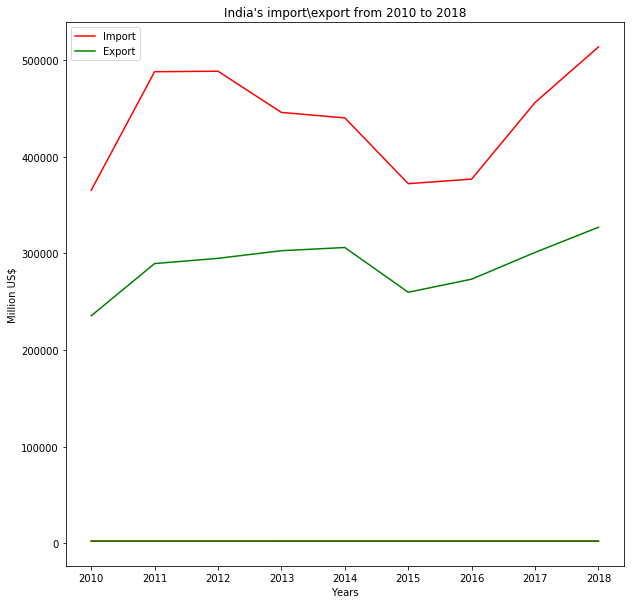

In [19]:
fig = plt.figure(figsize=(10, 10))
ax_import = fig.add_subplot(111)
ax_export = fig.add_subplot(111)
plt.ylabel('Million US$') # add y-label
plt.xlabel('Years') # add x-label
n = np.arange(9)
plt.xticks(n,['2010','2011','2012','2013','2014','2015','2016','2017','2018'])
plt.title('India\'s import\export from 2010 to 2018')
import_l,x=ax_import.plot(df_data_import[['value','year']].groupby(['year'],as_index=False).sum(),color='red')
export_l,y=ax_export.plot(df_data_export[['value','year']].groupby(['year'],as_index=False).sum(),color='green')
plt.legend([import_l, export_l], ['Import', 'Export'])

### Commodity wise data analysis

In [20]:
df_data_import_comwise=df_data_import[['HSCode','Commodity','value','year']].groupby(['HSCode','Commodity','year'],as_index=False).sum()
df_data_export_comwise=df_data_export[['HSCode','Commodity','value','year']].groupby(['HSCode','Commodity','year'],as_index=False).sum()


In [21]:
df_data_import_comwise.set_index('HSCode',inplace=True)
df_data_export_comwise.set_index('HSCode',inplace=True)

In [22]:
df_data_export_comwise[df_data_export_comwise['year']==2016].sort_values(by=['value'],ascending=False).head()

,Commodity,year,value
HSCode,,,
71,"NATURAL OR CULTURED PEARLS,PRECIOUS OR SEMIPRE...",2016,43622.24
27,"MINERAL FUELS, MINERAL OILS AND PRODUCTS OF TH...",2016,30482.12
87,VEHICLES OTHER THAN RAILWAY OR TRAMWAY ROLLING...,2016,14949.51
84,"NUCLEAR REACTORS, BOILERS, MACHINERY AND MECHA...",2016,14094.93
30,PHARMACEUTICAL PRODUCTS,2016,12929.55


In [23]:
df_data_export_comwise[df_data_export_comwise['year']==2017].sort_values(by=['value'],ascending=False).head()

,Commodity,year,value
HSCode,,,
71,"NATURAL OR CULTURED PEARLS,PRECIOUS OR SEMIPRE...",2017,41742.16
27,"MINERAL FUELS, MINERAL OILS AND PRODUCTS OF TH...",2017,36173.28
84,"NUCLEAR REACTORS, BOILERS, MACHINERY AND MECHA...",2017,17864.39
87,VEHICLES OTHER THAN RAILWAY OR TRAMWAY ROLLING...,2017,17254.46
29,ORGANIC CHEMICALS,2017,14726.91


In [24]:
df_data_export_comwise[df_data_export_comwise['year']==2018].sort_values(by=['value'],ascending=False).head()

,Commodity,year,value
HSCode,,,
27,"MINERAL FUELS, MINERAL OILS AND PRODUCTS OF TH...",2018,45192.14
71,"NATURAL OR CULTURED PEARLS,PRECIOUS OR SEMIPRE...",2018,40448.91
84,"NUCLEAR REACTORS, BOILERS, MACHINERY AND MECHA...",2018,20960.95
29,ORGANIC CHEMICALS,2018,18236.56
87,VEHICLES OTHER THAN RAILWAY OR TRAMWAY ROLLING...,2018,18095.99


In [25]:
values_2016 = df_data_export_comwise.loc[(df_data_export_comwise.year == 2016)].sort_values('value',ascending=False)['value'].head()
values_2016.loc['Other'] = df_data_export_comwise.loc[(df_data_export_comwise.year == 2016)].sort_values('value',ascending=False)['value'][5:].sum()

values_2017 = df_data_export_comwise.loc[(df_data_import_comwise.year == 2017)].sort_values('value',ascending=False)['value'].head()
values_2017.loc['Other'] = df_data_export_comwise.loc[(df_data_export_comwise.year == 2017)].sort_values('value',ascending=False)['value'][5:].sum()

values_2018 = df_data_export_comwise.loc[(df_data_import_comwise.year == 2018)].sort_values('value',ascending=False)['value'].head()
values_2018.loc['Other'] = df_data_export_comwise.loc[(df_data_export_comwise.year == 2018)].sort_values('value',ascending=False)['value'][5:].sum()

print(values_2018)
print(df_data_export_comwise.loc[(df_data_export_comwise.year == 2018)].sort_values('value',ascending=False)['value'].sum())

HSCode
27        45192.14
71        40448.91
84        20960.95
29        18236.56
87        18095.99
Other    184216.88
Name: value, dtype: float64
327151.43


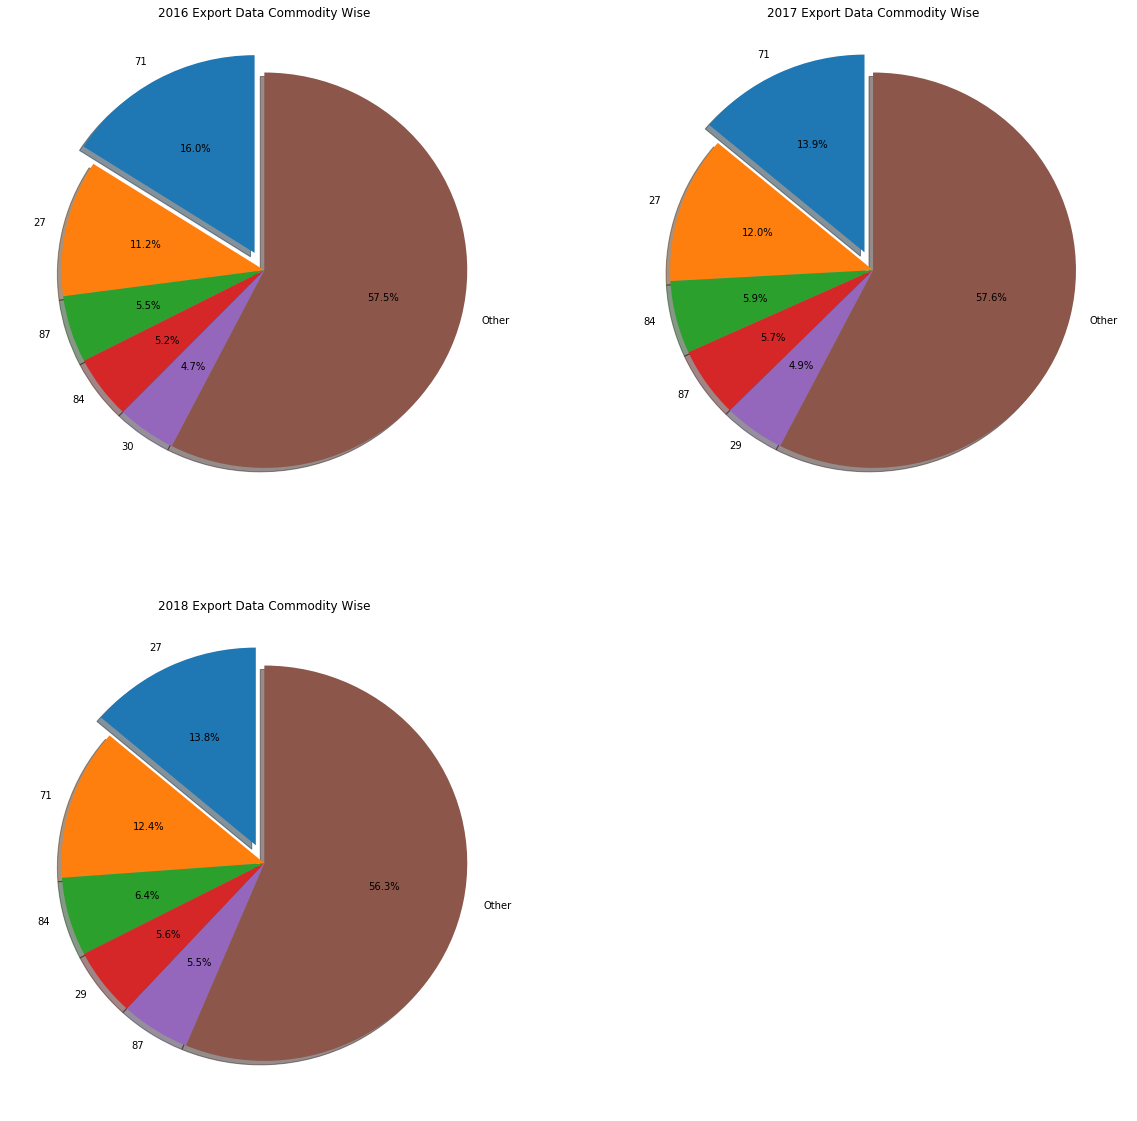

In [26]:
fig = plt.figure(figsize=[20,20]) # create figure

ax0 = fig.add_subplot(2, 2, 1) # add subplot 1 (1 row, 2 columns, first plot)
ax1 = fig.add_subplot(2, 2, 2) # add subplot 2 (1 row, 2 columns, second plot). See tip below**
ax2 = fig.add_subplot(2, 2, 3) # add subplot 1 (1 row, 2 columns, first plot)

labels = values_2016.index
sizes = values_2016
explode = (0.1, 0,0, 0, 0,0)


# Subplot 1: 2016 Pie plot
ax0.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax0.set_title ('2016 Export Data Commodity Wise')

labels = values_2017.index
sizes = values_2017
explode = (0.1, 0,0, 0, 0,0)

# Subplot 1: 2016 Pie plot
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.set_title ('2017 Export Data Commodity Wise')

labels = values_2018.index
sizes = values_2018
explode = (0.1, 0,0, 0, 0,0)

# Subplot 1: 2016 Pie plot
ax2.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax2.set_title ('2018 Export Data Commodity Wise')

plt.show()

In [27]:
df_data_import_comwise[df_data_export_comwise['year']==2016].sort_values(by=['value'],ascending=False).head()

,Commodity,year,value
HSCode,,,
27,"MINERAL FUELS, MINERAL OILS AND PRODUCTS OF TH...",2016,102930.41
71,"NATURAL OR CULTURED PEARLS,PRECIOUS OR SEMIPRE...",2016,53679.56
85,ELECTRICAL MACHINERY AND EQUIPMENT AND PARTS T...,2016,38558.11
84,"NUCLEAR REACTORS, BOILERS, MACHINERY AND MECHA...",2016,32079.03
29,ORGANIC CHEMICALS,2016,15470.76


In [28]:
df_data_import_comwise[df_data_export_comwise['year']==2017].sort_values(by=['value'],ascending=False).head()

,Commodity,year,value
HSCode,,,
27,"MINERAL FUELS, MINERAL OILS AND PRODUCTS OF TH...",2017,132052.92
71,"NATURAL OR CULTURED PEARLS,PRECIOUS OR SEMIPRE...",2017,66216.38
85,ELECTRICAL MACHINERY AND EQUIPMENT AND PARTS T...,2017,48230.63
84,"NUCLEAR REACTORS, BOILERS, MACHINERY AND MECHA...",2017,37767.08
29,ORGANIC CHEMICALS,2017,19157.02


In [29]:
df_data_import_comwise[df_data_export_comwise['year']==2018].sort_values(by=['value'],ascending=False).head()

,Commodity,year,value
HSCode,,,
27,"MINERAL FUELS, MINERAL OILS AND PRODUCTS OF TH...",2018,167860.72
71,"NATURAL OR CULTURED PEARLS,PRECIOUS OR SEMIPRE...",2018,64712.89
85,ELECTRICAL MACHINERY AND EQUIPMENT AND PARTS T...,2018,52045.96
84,"NUCLEAR REACTORS, BOILERS, MACHINERY AND MECHA...",2018,43835.06
29,ORGANIC CHEMICALS,2018,22382.64


In [30]:
values_2016 = df_data_import_comwise.loc[(df_data_import_comwise.year == 2016)].sort_values('value',ascending=False)['value'].head()
values_2016.loc['Other'] = df_data_import_comwise.loc[(df_data_import_comwise.year == 2016)].sort_values('value',ascending=False)['value'][5:].sum()

values_2017 = df_data_import_comwise.loc[(df_data_import_comwise.year == 2017)].sort_values('value',ascending=False)['value'].head()
values_2017.loc['Other'] = df_data_import_comwise.loc[(df_data_import_comwise.year == 2017)].sort_values('value',ascending=False)['value'][5:].sum()

values_2018 = df_data_import_comwise.loc[(df_data_import_comwise.year == 2018)].sort_values('value',ascending=False)['value'].head()
values_2018.loc['Other'] = df_data_import_comwise.loc[(df_data_import_comwise.year == 2018)].sort_values('value',ascending=False)['value'][5:].sum()


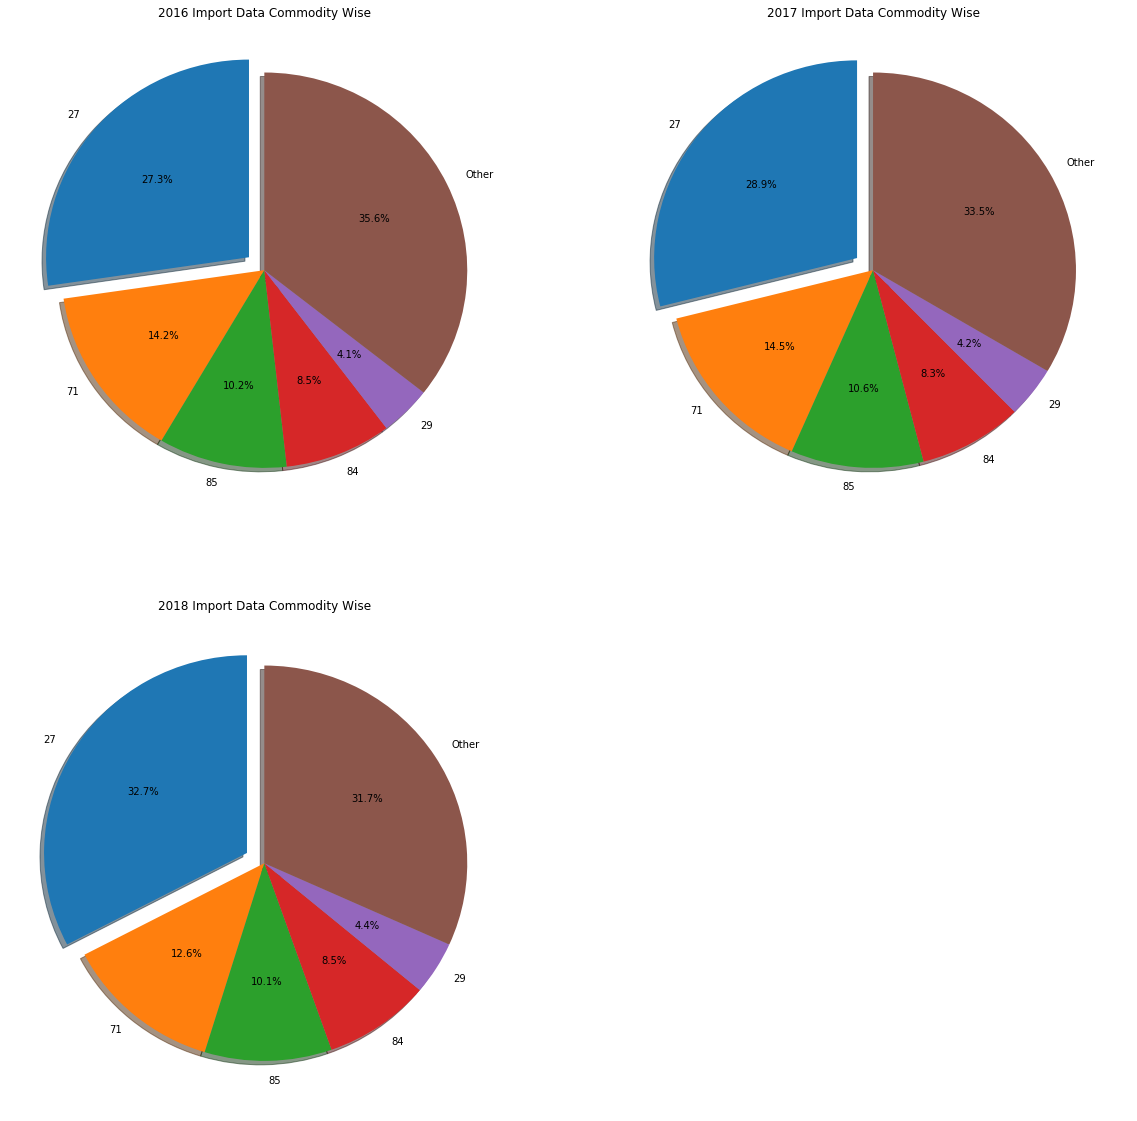

In [31]:
fig = plt.figure(figsize=[20,20]) # create figure

ax0 = fig.add_subplot(2, 2, 1) # add subplot 1 (1 row, 2 columns, first plot)
ax1 = fig.add_subplot(2, 2, 2) # add subplot 2 (1 row, 2 columns, second plot). See tip below**
ax2 = fig.add_subplot(2, 2, 3) # add subplot 1 (1 row, 2 columns, first plot)

labels = values_2016.index
sizes = values_2016
explode = (0.1, 0,0, 0, 0,0)


# Subplot 1: 2016 Pie plot
ax0.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax0.set_title ('2016 Import Data Commodity Wise')

labels = values_2017.index
sizes = values_2017
explode = (0.1, 0,0, 0, 0,0)

# Subplot 1: 2016 Pie plot
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.set_title ('2017 Import Data Commodity Wise')

labels = values_2018.index
sizes = values_2018
explode = (0.1, 0,0, 0, 0,0)

# Subplot 1: 2016 Pie plot
ax2.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax2.set_title ('2018 Import Data Commodity Wise')

plt.show()

### Understanding Increase of Import\Export from 2016

In [37]:
df_import_pivot = df_data_import.pivot_table(index='year',columns=['HSCode','Commodity','country'],aggfunc=sum, fill_value=0).T.reset_index()
df_import_pivot.set_index('HSCode',inplace=True)


df_export_pivot = df_data_export.pivot_table(index='year',columns=['HSCode','Commodity','country'],aggfunc=sum, fill_value=0).T.reset_index()
df_export_pivot.set_index('HSCode',inplace=True)


In [38]:
df_import_pivot.sort_values(by=[2016],ascending=False).head()

year,level_0,Commodity,country,2010,2011,2012,2013,2014,2015,2016,2017,2018
HSCode,,,,,,,,,,,,
85,value,ELECTRICAL MACHINERY AND EQUIPMENT AND PARTS T...,CHINA P RP,11857.72,14183.07,13984.34,14228.73,16738.41,19758.20,21982.63,28672.44,20627.56
27,value,"MINERAL FUELS, MINERAL OILS AND PRODUCTS OF TH...",SAUDI ARAB,17932.31,28302.37,29896.53,32781.57,23212.88,15177.91,15583.08,17816.06,24508.68
71,value,"NATURAL OR CULTURED PEARLS,PRECIOUS OR SEMIPRE...",SWITZERLAND,22815.23,32188.31,29679.47,17496.09,20384.67,17605.99,15581.11,17254.31,15476.53
27,value,"MINERAL FUELS, MINERAL OILS AND PRODUCTS OF TH...",IRAQ,8954.66,18826.19,19166.06,18450.33,14177.22,10759.19,11633.29,17544.32,22300.67
84,value,"NUCLEAR REACTORS, BOILERS, MACHINERY AND MECHA...",CHINA P RP,7699.90,10143.52,10007.00,9455.31,10144.22,10554.22,11121.17,13539.97,13383.76


In [39]:
df_export_pivot.sort_values(by=[2016],ascending=False).head()

year,level_0,Commodity,country,2010,2011,2012,2013,2014,2015,2016,2017,2018
HSCode,,,,,,,,,,,,
71,value,"NATURAL OR CULTURED PEARLS,PRECIOUS OR SEMIPRE...",U ARAB EMTS,19805.17,18392.75,18890.69,12778.80,12280.37,12934.57,13884.06,10832.28,10418.15
71,value,"NATURAL OR CULTURED PEARLS,PRECIOUS OR SEMIPRE...",HONG KONG,8670.13,11398.19,10632.37,11141.56,12206.19,10890.09,12835.84,13124.06,11140.21
71,value,"NATURAL OR CULTURED PEARLS,PRECIOUS OR SEMIPRE...",U S A,5272.78,6808.23,6749.99,7842.22,8419.58,8674.42,9734.37,10058.76,10442.27
30,value,PHARMACEUTICAL PRODUCTS,U S A,1833.32,2533.21,3093.24,3445.75,3769.08,5026.46,5098.25,4667.24,5389.73
27,value,"MINERAL FUELS, MINERAL OILS AND PRODUCTS OF TH...",SINGAPORE,5518.15,9549.73,7936.96,7464.60,5333.00,2998.87,4757.42,6179.90,5877.28


In [40]:
df_import_pivot['diff_2017_2016'] = df_import_pivot[2017] - df_import_pivot[2016]
df_import_pivot['diff_2018_2017'] = df_import_pivot[2018] - df_import_pivot[2017]

In [41]:
df_import_pivot.sort_values(by=['diff_2017_2016'],ascending=False).head()

year,level_0,Commodity,country,2010,2011,2012,2013,2014,2015,2016,2017,2018,diff_2017_2016,diff_2018_2017
HSCode,,,,,,,,,,,,,,
85,value,ELECTRICAL MACHINERY AND EQUIPMENT AND PARTS T...,CHINA P RP,11857.72,14183.07,13984.34,14228.73,16738.41,19758.20,21982.63,28672.44,20627.56,6689.81,-8044.88
27,value,"MINERAL FUELS, MINERAL OILS AND PRODUCTS OF TH...",IRAQ,8954.66,18826.19,19166.06,18450.33,14177.22,10759.19,11633.29,17544.32,22300.67,5911.03,4756.35
27,value,"MINERAL FUELS, MINERAL OILS AND PRODUCTS OF TH...",KUWAIT,9729.09,15718.33,15737.46,16121.78,12228.71,4059.61,3455.54,6121.36,6427.71,2665.82,306.35
27,value,"MINERAL FUELS, MINERAL OILS AND PRODUCTS OF TH...",OMAN,3293.14,2083.84,507.88,1514.11,732.51,584.67,390.56,2880.79,1685.15,2490.23,-1195.64
71,value,"NATURAL OR CULTURED PEARLS,PRECIOUS OR SEMIPRE...",HONG KONG,7794.46,8240.72,5501.39,4771.83,4094.58,4127.22,6279.90,8708.93,5930.47,2429.03,-2778.46


In [82]:
df_import_pivot[['Commodity','country',2010,2011,2012,2013,2014,2015,2016,2017,2018,'diff_2018_2017']].sort_values(by=['diff_2018_2017'],ascending=False).head()

year,Commodity,country,2010,2011,2012,2013,2014,2015,2016,2017,2018,diff_2018_2017
HSCode,,,,,,,,,,,,
85,ELECTRICAL MACHINERY AND EQUIPMENT AND PARTS T...,HONG KONG,634.96,607.06,525.84,577.47,665.15,1007.18,1126.58,1208.41,8657.63,7449.22
27,"MINERAL FUELS, MINERAL OILS AND PRODUCTS OF TH...",SAUDI ARAB,17932.31,28302.37,29896.53,32781.57,23212.88,15177.91,15583.08,17816.06,24508.68,6692.62
71,"NATURAL OR CULTURED PEARLS,PRECIOUS OR SEMIPRE...",U S A,2792.03,2305.00,4374.26,2131.30,3521.72,3153.91,2082.36,2762.73,8230.09,5467.36
27,"MINERAL FUELS, MINERAL OILS AND PRODUCTS OF TH...",IRAQ,8954.66,18826.19,19166.06,18450.33,14177.22,10759.19,11633.29,17544.32,22300.67,4756.35
27,"MINERAL FUELS, MINERAL OILS AND PRODUCTS OF TH...",U ARAB EMTS,9398.23,15102.54,14984.68,13263.35,13509.04,7912.80,9457.60,9080.71,13656.84,4576.13


In [220]:
print(df_import_pivot.sort_values(by=['diff_2017_2016'],ascending=False)['diff_2017_2016'].head().sum())
print(df_import_pivot.sort_values(by=['diff_2017_2016'],ascending=False)['diff_2017_2016'].sum())

print(df_import_pivot.sort_values(by=['diff_2018_2017'],ascending=False)['diff_2018_2017'].head().sum())
print(df_import_pivot.sort_values(by=['diff_2018_2017'],ascending=False)['diff_2018_2017'].sum())

20185.92
79372.87
28941.68
57602.03


In [43]:
df_export_pivot['diff_2017_2016'] = df_export_pivot[2017] - df_export_pivot[2016]
df_export_pivot['diff_2018_2017'] = df_export_pivot[2018] - df_export_pivot[2017]

In [44]:
df_export_pivot.sort_values(by=['diff_2017_2016'],ascending=False).head()

year,level_0,Commodity,country,2010,2011,2012,2013,2014,2015,2016,2017,2018,diff_2017_2016,diff_2018_2017
HSCode,,,,,,,,,,,,,,
27,value,"MINERAL FUELS, MINERAL OILS AND PRODUCTS OF TH...",SINGAPORE,5518.15,9549.73,7936.96,7464.60,5333.00,2998.87,4757.42,6179.90,5877.28,1422.48,-302.62
29,value,ORGANIC CHEMICALS,CHINA P RP,701.81,901.95,1019.64,918.77,1045.40,842.84,882.22,2106.24,3249.21,1224.02,1142.97
87,value,VEHICLES OTHER THAN RAILWAY OR TRAMWAY ROLLING...,U S A,773.87,919.68,1007.76,1058.83,1287.74,1420.90,1195.45,2125.82,2854.93,930.37,729.11
74,value,COPPER AND ARTICLES THEREOF.,CHINA P RP,1365.69,2019.93,2010.97,1841.71,1890.82,1144.10,701.93,1548.47,244.06,846.54,-1304.41
10,value,CEREALS.,BANGLADESH PR,172.41,266.97,569.10,924.26,851.98,279.75,62.03,871.50,301.34,809.47,-570.16


In [45]:
df_export_pivot.sort_values(by=['diff_2018_2017'],ascending=False).head()

year,level_0,Commodity,country,2010,2011,2012,2013,2014,2015,2016,2017,2018,diff_2017_2016,diff_2018_2017
HSCode,,,,,,,,,,,,,,
27,value,"MINERAL FUELS, MINERAL OILS AND PRODUCTS OF TH...",NETHERLAND,4189.39,4557.95,6295.14,3793.20,2472.18,1047.67,1414.53,2149.94,4364.22,735.41,2214.28
27,value,"MINERAL FUELS, MINERAL OILS AND PRODUCTS OF TH...",U ARAB EMTS,5019.58,6571.21,6964.32,5039.94,6519.64,4004.77,3907.11,4663.09,6367.54,755.98,1704.45
27,value,"MINERAL FUELS, MINERAL OILS AND PRODUCTS OF TH...",CHINA P RP,825.14,1173.19,326.08,1022.88,1290.59,641.71,789.48,1507.21,2855.69,717.73,1348.48
89,value,"SHIPS, BOATS AND FLOATING STRUCTURES.",SINGAPORE,859.28,3399.87,1723.50,1614.65,871.92,1593.98,1590.68,675.17,1989.65,-915.51,1314.48
84,value,"NUCLEAR REACTORS, BOILERS, MACHINERY AND MECHA...",U S A,1140.68,1585.81,1627.68,1589.12,2157.13,1849.86,2071.12,2838.20,4026.34,767.08,1188.14


### Country wise import\export data analysis

In [46]:
df_data_import_countrywise=df_data_import[['country','value','year']].groupby(['country','year'],as_index=False).sum()
df_data_export_countrywise=df_data_export[['country','value','year']].groupby(['country','year'],as_index=False).sum()


In [47]:
df_data_import_countrywise.set_index('country',inplace=True)
df_data_export_countrywise.set_index('country',inplace=True)

In [48]:
df_data_import_countrywise[df_data_import_countrywise['year']==2016].sort_values(by=['value'],ascending=False).head()

,year,value
country,,
CHINA P RP,2016,61282.66
U S A,2016,22307.18
U ARAB EMTS,2016,21509.69
SAUDI ARAB,2016,19972.36
SWITZERLAND,2016,17248.54


In [49]:
df_data_import_countrywise[df_data_import_countrywise['year']==2017].sort_values(by=['value'],ascending=False).head()

,year,value
country,,
CHINA P RP,2017,76380.35
U S A,2017,26610.72
SAUDI ARAB,2017,22069.91
U ARAB EMTS,2017,21738.98
SWITZERLAND,2017,18922.88


In [50]:
df_data_import_countrywise[df_data_import_countrywise['year']==2018].sort_values(by=['value'],ascending=False).head()

,year,value
country,,
CHINA P RP,2018,70319.29
U S A,2018,35549.20
U ARAB EMTS,2018,29785.09
SAUDI ARAB,2018,28479.19
IRAQ,2018,22372.46


In [51]:
values_2016 = df_data_import_countrywise.loc[(df_data_import_countrywise.year == 2016)].sort_values('value',ascending=False)['value'].head()
values_2016.loc['Other'] = df_data_import_countrywise.loc[(df_data_import_countrywise.year == 2016)].sort_values('value',ascending=False)['value'][5:].sum()

values_2017 = df_data_import_countrywise.loc[(df_data_import_countrywise.year == 2017)].sort_values('value',ascending=False)['value'].head()
values_2017.loc['Other'] = df_data_import_countrywise.loc[(df_data_import_countrywise.year == 2017)].sort_values('value',ascending=False)['value'][5:].sum()

values_2018 = df_data_import_countrywise.loc[(df_data_import_countrywise.year == 2018)].sort_values('value',ascending=False)['value'].head()
values_2018.loc['Other'] = df_data_import_countrywise.loc[(df_data_import_countrywise.year == 2018)].sort_values('value',ascending=False)['value'][5:].sum()

print(values_2018)
print(df_data_import_countrywise.loc[(df_data_import_countrywise.year == 2018)].sort_values('value',ascending=False)['value'].sum())

country
CHINA P RP      70319.29
U S A           35549.20
U ARAB EMTS     29785.09
SAUDI ARAB      28479.19
IRAQ            22372.46
Other          327476.39
Name: value, dtype: float64
513981.62


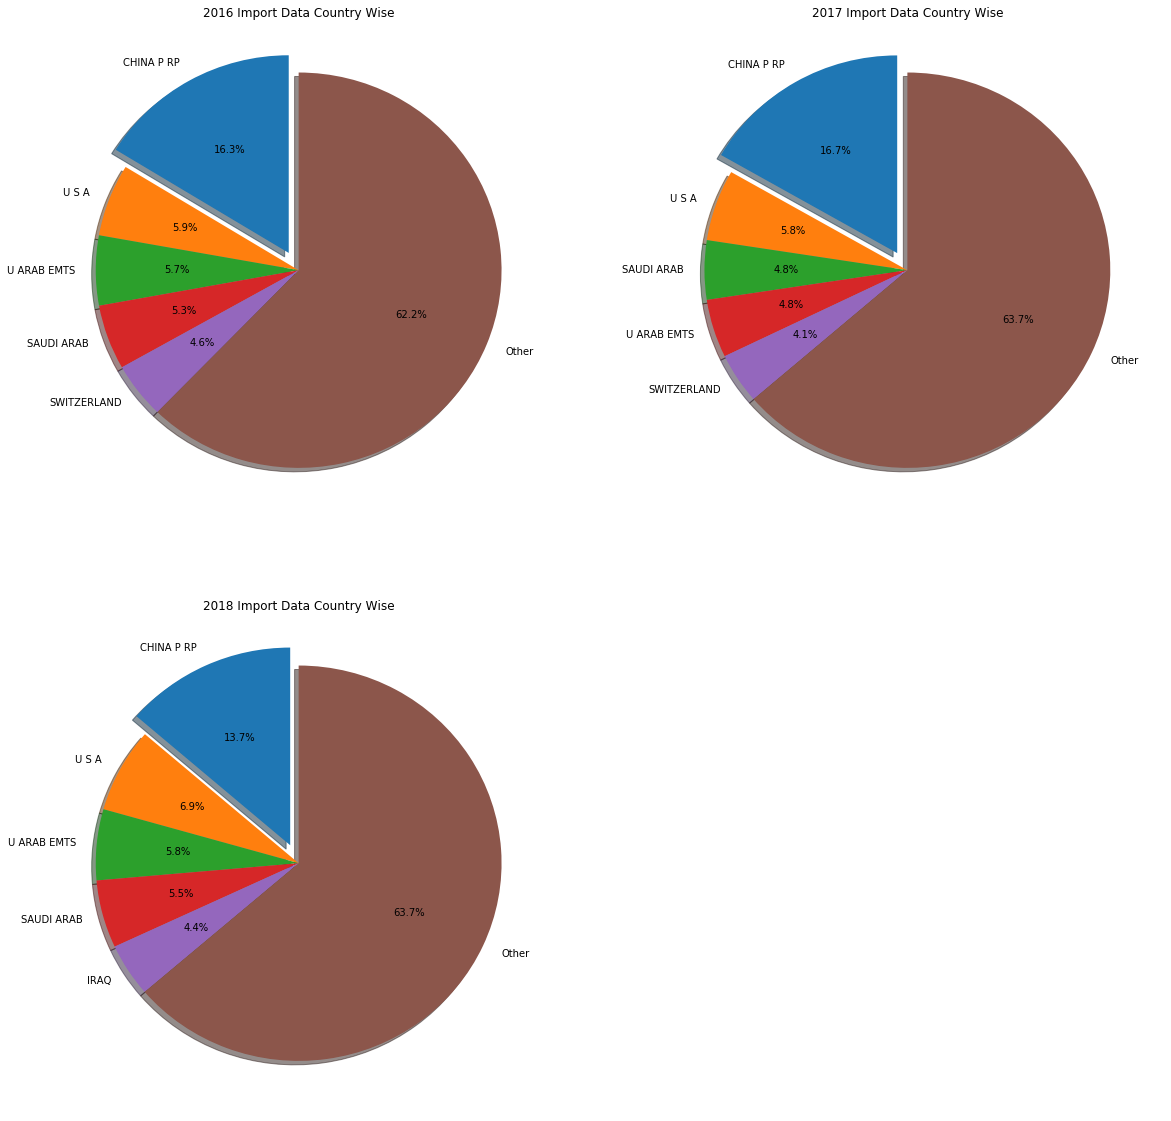

In [52]:
fig = plt.figure(figsize=[20,20]) # create figure

ax0 = fig.add_subplot(2, 2, 1) # add subplot 1 (1 row, 2 columns, first plot)
ax1 = fig.add_subplot(2, 2, 2) # add subplot 2 (1 row, 2 columns, second plot). See tip below**
ax2 = fig.add_subplot(2, 2, 3) # add subplot 1 (1 row, 2 columns, first plot)

labels = values_2016.index
sizes = values_2016
explode = (0.1, 0,0, 0, 0,0)


# Subplot 1: 2016 Pie plot
ax0.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax0.set_title ('2016 Import Data Country Wise')

labels = values_2017.index
sizes = values_2017
explode = (0.1, 0,0, 0, 0,0)

# Subplot 1: 2016 Pie plot
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.set_title ('2017 Import Data Country Wise')

labels = values_2018.index
sizes = values_2018
explode = (0.1, 0,0, 0, 0,0)

# Subplot 1: 2016 Pie plot
ax2.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax2.set_title ('2018 Import Data Country Wise')

plt.show()

In [53]:
df_data_export_countrywise[df_data_export_countrywise['year']==2016].sort_values(by=['value'],ascending=False).head()

,year,value
country,,
U S A,2016,42211.96
U ARAB EMTS,2016,31175.16
HONG KONG,2016,14047.13
CHINA P RP,2016,10171.66
SINGAPORE,2016,9564.32


In [54]:
df_data_export_countrywise[df_data_export_countrywise['year']==2017].sort_values(by=['value'],ascending=False).head()

,year,value
country,,
U S A,2017,47878.17
U ARAB EMTS,2017,28145.77
HONG KONG,2017,14690.11
CHINA P RP,2017,13333.33
SINGAPORE,2017,10202.57


In [55]:
df_data_export_countrywise[df_data_export_countrywise['year']==2018].sort_values(by=['value'],ascending=False).head()

,year,value
country,,
U S A,2018,52405.88
U ARAB EMTS,2018,30126.38
CHINA P RP,2018,16751.94
HONG KONG,2018,13001.84
SINGAPORE,2018,11572.04


In [56]:
values_2016 = df_data_export_countrywise.loc[(df_data_export_countrywise.year == 2016)].sort_values('value',ascending=False)['value'].head()
values_2016.loc['Other'] = df_data_export_countrywise.loc[(df_data_export_countrywise.year == 2016)].sort_values('value',ascending=False)['value'][5:].sum()

values_2017 = df_data_export_countrywise.loc[(df_data_export_countrywise.year == 2017)].sort_values('value',ascending=False)['value'].head()
values_2017.loc['Other'] = df_data_export_countrywise.loc[(df_data_export_countrywise.year == 2017)].sort_values('value',ascending=False)['value'][5:].sum()

values_2018 = df_data_export_countrywise.loc[(df_data_export_countrywise.year == 2018)].sort_values('value',ascending=False)['value'].head()
values_2018.loc['Other'] = df_data_export_countrywise.loc[(df_data_export_countrywise.year == 2018)].sort_values('value',ascending=False)['value'][5:].sum()

print(values_2018)
print(df_data_export_countrywise.loc[(df_data_export_countrywise.year == 2018)].sort_values('value',ascending=False)['value'].sum())

country
U S A           52405.88
U ARAB EMTS     30126.38
CHINA P RP      16751.94
HONG KONG       13001.84
SINGAPORE       11572.04
Other          203293.35
Name: value, dtype: float64
327151.43


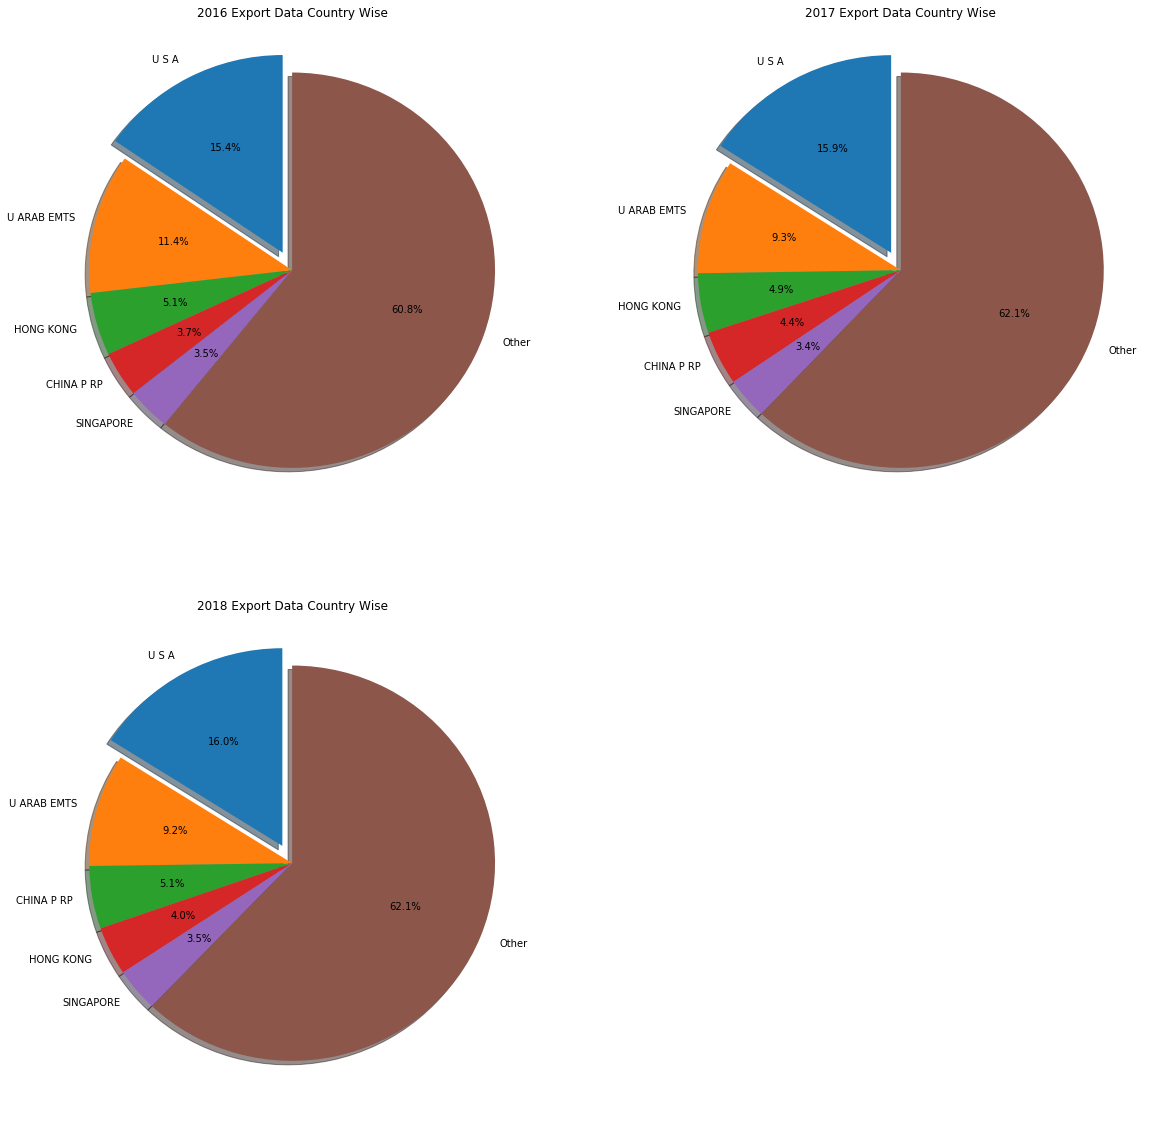

In [57]:
fig = plt.figure(figsize=[20,20]) # create figure

ax0 = fig.add_subplot(2, 2, 1) # add subplot 1 (1 row, 2 columns, first plot)
ax1 = fig.add_subplot(2, 2, 2) # add subplot 2 (1 row, 2 columns, second plot). See tip below**
ax2 = fig.add_subplot(2, 2, 3) # add subplot 1 (1 row, 2 columns, first plot)

labels = values_2016.index
sizes = values_2016
explode = (0.1, 0,0, 0, 0,0)


# Subplot 1: 2016 Pie plot
ax0.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax0.set_title ('2016 Export Data Country Wise')

labels = values_2017.index
sizes = values_2017
explode = (0.1, 0,0, 0, 0,0)

# Subplot 1: 2016 Pie plot
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.set_title ('2017 Export Data Country Wise')

labels = values_2018.index
sizes = values_2018
explode = (0.1, 0,0, 0, 0,0)

# Subplot 1: 2016 Pie plot
ax2.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax2.set_title ('2018 Export Data Country Wise')

plt.show()

### Word Cloud of Country Names (Import\Export)

In [68]:
df_export_wrod_cloud=pd.DataFrame(df_data_export_countrywise.groupby(df_data_export_countrywise.index)['value'].sum())

In [69]:
df_export_wrod_cloud['value'].sum()

2590259.5800000001

In [71]:
df_export_wrod_cloud['percentage']=(df_export_wrod_cloud['value']/df_export_wrod_cloud['value'].sum())*10000

In [72]:
s_export_world_cloud = ''
for index, row in df_export_wrod_cloud.iterrows():
     s_export_world_cloud = s_export_world_cloud + (index.replace(' ','') + ',') * row[1].astype(int) + ','


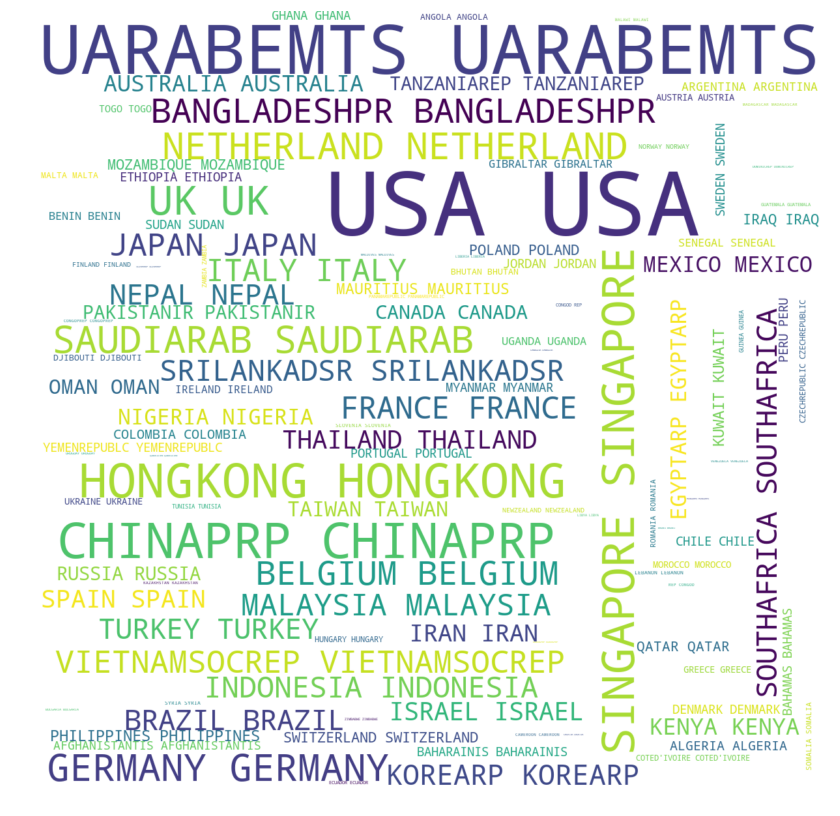

In [73]:
india_mask = np.array(Image.open('india-png--1200.png'))
# instantiate a word cloud object
export_wc = WordCloud(background_color='white', max_words=2000, mask=india_mask)

# generate the word cloud
export_wc.generate(s_export_world_cloud)

# display the word cloud
fig = plt.figure()
fig.set_figwidth(14) # set width
fig.set_figheight(18) # set height

plt.imshow(export_wc, interpolation='bilinear')
plt.axis('off')
plt.show()


In [74]:
df_import_wrod_cloud=pd.DataFrame(df_data_import_countrywise.groupby(df_data_import_countrywise.index)['value'].sum())
#.apply(lambda x:100 * x / float(x.sum()))

In [75]:
df_import_wrod_cloud['percentage']=(df_import_wrod_cloud['value']/df_import_wrod_cloud['value'].sum())*10000

In [76]:
s_import_world_cloud = ''
for index, row in df_import_wrod_cloud.iterrows():
     s_import_world_cloud = s_import_world_cloud + (index.replace(' ','') + ',') * row[1].astype(int) + ','


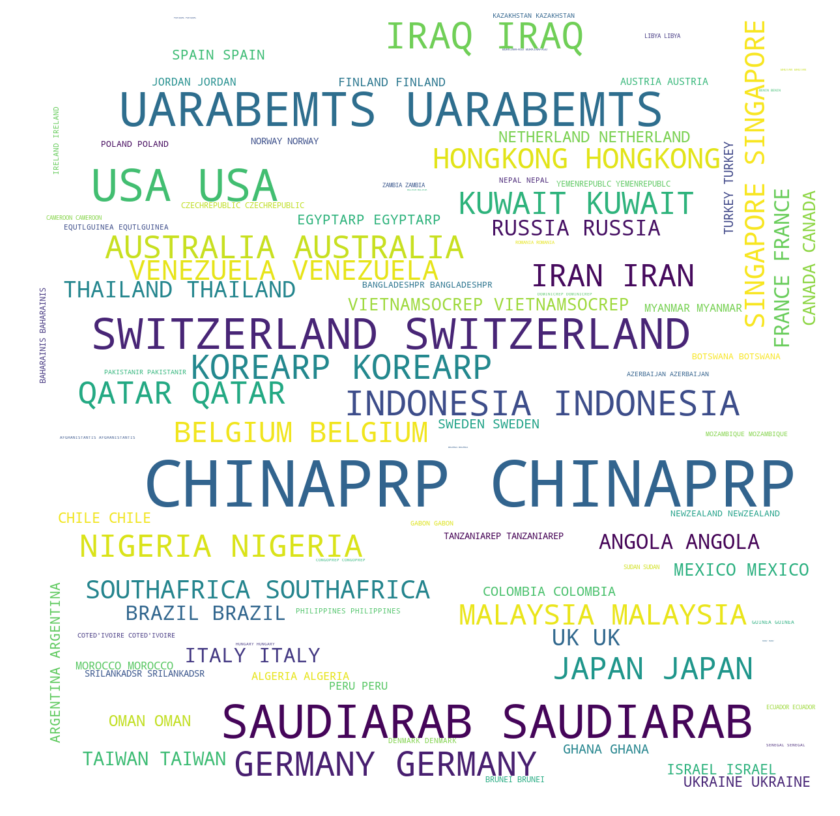

In [77]:
india_mask = np.array(Image.open('india-png--1200.png'))
# instantiate a word cloud object
import_wc = WordCloud(background_color='white', max_words=2000, mask=india_mask)

# generate the word cloud
import_wc.generate(s_import_world_cloud)

# display the word cloud
fig = plt.figure()
fig.set_figwidth(14) # set width
fig.set_figheight(18) # set height

plt.imshow(import_wc, interpolation='bilinear')
plt.axis('off')
plt.show()